# **1. Libraries**


Import certain libraries and mount the drive where the corpus is stored.

In [ ]:
#Import certain libraries and mount the drive where the corpus is stored.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style(style = 'whitegrid')
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

# **2. Analysis of the Mental Health dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DatasetMH.csv", sep = ";", header = None)
dataset.drop(dataset.head(1).index,inplace = True)


dataset.head(3)


**Columns are renamed to organise tweets with corresponding emotion**

In [ ]:
dataset.columns = ["Tweet", "emote", "Rating_Polarity","emocion","none","none","none"]
#Label Polaridad is Polarity
#Label Emoticonos is Emoticons
#Label nada is null

**Graph to show the distribution of Instagram comments in the dataset by emotion**

In [ ]:
#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral

plt.figure(figsize=(5, 3))
sns.countplot(x = 'Rating_Polarity', data = dataset, palette = 'rocket',
              order=['Negativa', 'Positiva', 'Indeterminado']);


**Three datasets are created, one for each class to print the number of tweets of each class, in this case of each polarity (positive, negative, Neutral)**

In [ ]:
#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral

dataset_Positive = dataset[dataset['Rating_Polarity'] == 'Positiva']
dataset_Negative = dataset[dataset['Rating_Polarity'] == 'Negativa']
dataset_None = dataset[dataset['Rating_Polarity'] == 'Indeterminado']


print("NUMBER OF COMMENTS:\n",
      "\nPositive   ", len(dataset_Positive),
      "\nNegative  ", len(dataset_Negative),
      "\nNutral       ", len(dataset_None))

**Dataset visualisation**

In [ ]:
dataset = pd.concat([dataset_Positive, dataset_Negative, dataset_None], axis = 0)

dataset

**Import libraries**

In [ ]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# **3. Data processing**

**Text pre-processing and tokenisation function**

In [ ]:
import re

from nltk import TweetTokenizer
import spacy
from nltk.stem import SnowballStemmer

# We create the function 'processed' which will delete stopwords and some characters peculiar to social networks
def processing(text):
  #Spanish stopwords
  stopWords_without_prepositions = {'al', 'algo', 'algunas', 'algunos', 'antes', 'como', 'cual', 'cuando', 'del', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas',
                               'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve',
                               'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis',
                               'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis', 'fuéramos', 'fuésemos', 'ha', 'habida', 'habidas', 'habido', 'habidos', 'habiendo', 'habremos', 'habrá', 'habrán', 'habrás',
                               'habré', 'habréis', 'habría', 'habríais', 'habríamos', 'habrían', 'habrías', 'habéis', 'había', 'habíais', 'habíamos', 'habían', 'habías', 'han', 'has', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'he', 'hemos', 'hube', 'hubiera', 'hubierais', 'hubieran', 'hubieras',
                               'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses', 'hubimos', 'hubiste', 'hubisteis', 'hubiéramos', 'hubiésemos', 'hubo', 'la', 'las', 'le', 'les', 'lo', 'los', 'me', 'mi', 'mis', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'nos',
                               'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'o', 'os', 'otra', 'otras', 'otro', 'otros', 'pero', 'poco', 'porque', 'que', 'quien', 'quienes', 'qué', 'se', 'sea', 'seamos', 'sean', 'seas', 'sentid', 'sentida', 'sentidas', 'sentido', 'sentidos', 'seremos',
                               'será', 'serán', 'serás', 'seré', 'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis', 'siente', 'sintiendo', 'sois', 'somos', 'son', 'soy', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sí', 'también', 'tanto', 'te', 'tendremos', 'tendrá', 'tendrán', 'tendrás',
                               'tendré', 'tendréis', 'tendría', 'tendríais', 'tendríamos', 'tendrían', 'tendrías', 'tened', 'tenemos', 'tenga', 'tengamos', 'tengan', 'tengas', 'tengo', 'tengáis', 'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'tenía', 'teníais', 'teníamos', 'tenían', 'tenías',
                               'ti', 'tiene', 'tienen', 'tienes', 'todo', 'todos', 'tu', 'tus', 'tuve', 'tuviera', 'tuvierais', 'tuvieran', 'tuvieras', 'tuvieron', 'tuviese', 'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste', 'tuvisteis', 'tuviéramos', 'tuviésemos', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos',
                               'tú', 'un', 'una', 'uno', 'unos', 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'éramos'}
  #Translation into english  of stopwords
  #stopWords_without_prepositions = {"'to', 'something', 'some', 'some', 'before', 'like', 'which', 'when', 'of the', 'where', 'during', 'and', 'the', 'she', 'they', 'they', 'he', 'were', 'were', 'were', 'were', 'is', 'that', 'those', 'that', 'that', 'those', 'this', 'was', 'were', 'were', 'were', 'you were', 'be', 'we will', 'will be', 'will be', 'will be', 'will be', 'I will be', 'will be', 'would be', 'would be', 'would be', 'would be', 'would be', 'these', 'this', 'let us', 'this', 'these', 'I am', 'I was', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'was', 'were', 'were', 'were', 'were', 'were', 'was', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were', 'were',}


  DIACRITICAL_VOWELS = [('á','a'), ('é','e'), ('í','i'), ('ó','o'), ('ú','u'), ('ü','u')]


  SLANG = [('d','de'), ('[qk]','que'), ('xo','pero'), ('xa', 'para'), ('[xp]q','porque'),('es[qk]', 'es que'),
           ('fvr','favor'),('(xfa|xf|pf|plis|pls|porfa)', 'por favor'), ('dnd','donde'), ('tb', 'también'),
           ('(tq|tk)', 'te quiero'), ('(tqm|tkm)', 'te quiero mucho'), ('x','por'), ('\+','mas')]
  #Translation into english
  #SLANG = [(‘d’,‘of’), (‘[qk]’,‘what’), (‘xo’,‘but’), (‘xa’,‘for’), (‘[xp]q’,‘why’),(‘es[qk]’,‘is that’),
           #(‘fvr’, ‘please’),(‘(xfa|xf|pf|plis|pls|please)’, ‘please’), (‘dnd’, ‘where’), (‘tb’, ‘also’),
           #(‘(tq|tk)’, ‘I love you’), (‘(tqm|tkm)’, ‘I love you very much’), (‘x’, ‘for’), (‘+’, ‘more’)]

  # Delete mentions  @, # , links...
  text = str(text)
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
  text = re.sub(r'RT[|\s]', ' ', text)
  text = re.sub(r'#', ' ', text)
  text = re.sub(r'https?:\/\/\S+', ' ', text)

  stemming = True

  lemmatization = False

  #Stemming in spanish
  _stemmer = SnowballStemmer('spanish')

  #lemmatisation in Spanish
  #nlp = spacy.load('es_core_news_sm')

  # Message tokeniser (we use this one from Twitter)
  _tokenizer = TweetTokenizer().tokenize

  _stemming = stemming


  # Convert to lower case
  text = text.lower()


  # Delete numbers and carriage returns
  text = re.sub(r'(\d+|\n)', '', text)

  # Deleting vowels with diacritical marks
  for s,t in DIACRITICAL_VOWELS:
    text = re.sub(r'{0}'.format(s), t, text)

  # Delete repeated characters
  text = re.sub(r'(.)\1{2,}', r'\1\1', text)

  # Normalise laughter and replace with predefined variables
  text = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}\b', ' ', text)
  text = re.sub(r'\b(juas+|lol)\b', ' ', text)

  # translate slang
  for s,t in SLANG:
    text = re.sub(r'\b{0}\b'.format(s), t, text)


  pattern = r'''(?x)                  # Set flag to allow verbose regexps
              (?:[A-Z]\.)+            # Abbreviations, e.g. U.S.A
              | \w+(?:-\w+)*          # Words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%?    # Currency and precentages, e.g. $12.40 82%
              | \.\.\.                # Ellipsis
              | [][.,;"'?():-_`]      # These are separate tokens; includes
              | [😀\😁\😂\🤣\😃\😄\😅\😆\😉\😊\😋\😎\😍\😘\😗\😙\😚\☺\🙂\🤗\🤩\😌\😛\😜\😝\🤤\🤑\😇\🤭\😺\😸\😹\😻\😽\💪\✌\🖐\✋\👌\👍\👋\👏\🙌\🙏\💋\💘\❤\💓\💔\💕\💖\💗\💙\💚\💛\🧡\💜\🖤\💝\💞\💟\❣\💌\🍺\🍻\🎉\🎊\🙋\🕺\💃] # \:d\:)\:-)\:-d\;d\;-)\=d\;)\:]\:-]\=)\=]\(:\xd\:p\:-p\8)\xp\<3
              | [:d]
              | [:)]
              #| [:-)]
              | [:-d]
              | [;d]
              #| [;-)]
              | [=d]
              | [;)]
              | [:]]
              | [:-]]
              | [=)]
              | [=]]
              | [(:]
              | [xd]
              | [:p]
              | [:-p]
              | [8)]
              | [xp]
              | [<3]
              | [🤔\🤨\😐\😑\😶\🙄\😏\😮\🤐\😯\😒\😕\🙃\😲\😼\🤷] # \:-|\:|]
              | [:-|]
              | [:|]
              | [😣\😥\😪\😫\😓\😔\☹\🙁\😖\😞\😟\😤\😢\😭\😦\😧\😨\😩\🤯\😬\😰\😱\😳\😵\😡\😠\🤬\😷\🤒\🤕\🤢\🤮\🤧\💩\🙀\😿\😾\🖕\👎\⛔\🚫\🤦] # \:-(\:(\:-<\:<\:-[\:[\>:-[\>:[\:-{\:{\:-@\:@\>:-(\>:(\:-(\:(\d:\:\\:/\:-/\:-\\dx\d8
              #| [:-(]
              #| [:(]
              | [:-<]
              | [:<]
              | [:-[]
              | [:[]
              | [>:-[]
              | [>:[]
              | [:-{]
              | [:{]
              | [:-@]
              | [:@]
              #| [>:-(]
              | [>:(]
              | [:'-(]
              | [:'(]
              | [d:]
              | [:\]
              | [:/]
              #| [:-/]
              | [:-\]
              | [dx]
              | [d8]
              '''

  if _stemming:
    text = ' '.join(_stemmer.stem(w) for w in _tokenizer(text))

  if lemmatization:
    text_aux=nlp(text)
    for word in text_aux:
      text+=str(word.lemma_)+" "


  words = nltk.regexp_tokenize(text, pattern)
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))      # Remove punctuation marks

  stripped = [re_punc.sub('', w) for w in words]                    # Remove stopwords


  text = [w for w in stripped if  w.lower() not in stopWords_without_prepositions]


  return (" ".join(text))



**The processed function is applied to each Instagram comment in the corpus. We process the data and apply stemming**

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(processing)
dataset['Tweet'] = dataset['Tweet'].str.lower()

dataset["Tweet"]


**Create a WordCloud**

In [ ]:
#Create a WordCloud
from wordcloud import WordCloud

#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral


datasetP=dataset[dataset['Rating_Polarity'] == 'Positiva']
datasetN=dataset[dataset['Rating_Polarity'] == 'Negativa']
datasetNO=dataset[dataset['Rating_Polarity'] == 'Indeterminado']
tweets= datasetP["Tweet"].head(1000).values
tweets=str(tweets)
print(len(tweets))
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp.update(["mas","si","dice","hoy","dia"])
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=stop_words_sp,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(tweets)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Vocabulary building with 3 Polarities (Positive, Negative Neutral)**

In [ ]:
#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral

vocab={}
etiquetas=["Negativo","Positivo","indeterminado"]
numero_clases=len(etiquetas)
_tokenizer = TweetTokenizer().tokenize

for i in dataset.index:
  polaridad=dataset["Rating_Polarity"][i]
  if polaridad =="Negativo":
    posicion=0
  elif polaridad == "Positivo":
    posicion=1
  else:
    posicion=2
  for word in _tokenizer(dataset["Tweet"][i]):
    if word not in vocab.keys():
      vocab[word]=[0] * 3
      # with this I turn it into a list of 3 integers
      vocab[word][posicion] = 1
    else:
      vocab[word][posicion] += 1

print(vocab)

**Entropy and information gain formulas for selecting the optimal vocabulary for the dataset**

In [ ]:
def entropy(probs, adjust=1e-15):
  total=0
  for prob in probs:
    if(prob>0):
      total+= (prob + adjust) * np.math.log(prob+adjust,2)

  return total


def IG(corpus_probs, word_weigths, word_probs):

  corpus_entropy= entropy(corpus_probs)
  word_entropy=0

  for i in range(len(word_weigths)):
    word_entropy+= (word_weigths[i]* entropy(word_probs[i]))
  return corpus_entropy - word_entropy

**Calculation of the IG of each word in the corpus for the 6 classes that are emotions**



In [ ]:
import operator
tweets_positivos=len(dataset_Positive)
tweets_negativos=len(dataset_Negative)
tweets_indeterminados=len(dataset_None)

#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral


tweets_total=tweets_positivos+tweets_negativos+tweets_indeterminados

class_counts=[tweets_negativos,tweets_positivos,tweets_indeterminados]
class_probs=np.array(class_counts) / tweets_totales

vocab_entropy = {}
for word in vocab.keys():

    # Frequency of the word in the corpus
    wc1 = sum(vocab[word])

    # Frequency of the word not being in the corpus
    wc0 = tweets_total - wc1

    # Probabilities of the word to be in each of the classes
    probs_1 = [vocab[word][i] / wc1 for i in range(len(vocab[word]))]

    # Probabilities of the word not being in each of the classes
    probs_0 = [(class_counts[i] - vocab[word][i]) / (tweets_total - wc1) for i in range(len(vocab[word]))]

    # Probabilities of the word being in a message
    p_word = wc1 / tweets_total

    # Probability that the word is not in a message
    p_abs_word = (tweets_total - wc1) / tweets_total

    # Calculation of the entropy of each word using IG
    vocab_entropy[word] = IG(class_probs, [p_word, p_abs_word], [probs_1, probs_0])


# vocab_entropy_ord = dict(sorted(vocab_entropy.items(), key=operator.itemgetter(1), reverse=True))
# The words are sorted according to the IG value, from the highest value to the lowest value
vocab_entropy_ord = dict(sorted(vocab_entropy.items(), key=operator.itemgetter(1)))

print(vocab_entropy_ord)

wordsVocab = []
for word in vocab_entropy_ord:
    wordsVocab.append(word)

**One Hot Encoding technique shall be performed on the Polarity column. This technique, encodes categorical features as a single-use numeric array. The input to this transformer must be an array of integers or text strings, denoting the values taken by categorical (discrete) features. A binary column is created for each category and a sparse matrix is returned.**

In [ ]:
one_hot = pd.get_dummies(dataset["Rating_Polarity"])
dataset.drop(['Rating_Polarity'], axis = 1, inplace = True)
dataset = pd.concat([dataset, one_hot], axis = 1)
dataset

# **4. Training and Test Data**

**The dataset is divided in two, 30% for testing and 70% for training**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X = dataset['Tweet'].values
y = dataset.iloc[:,-3:].values #to take the last 3 columms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

**Creation of the Corpus vocabulary**


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros

# oov_token is a special token in case this word is not in the dictionary
tokenizer = Tokenizer(oov_token='<OOV>')

# The dictionary is created from the best "X" number of words
tokenizer.fit_on_texts(wordVocab[:1650])

# the following line of code is the total dictionary without the "X" best words
# to take all vocabulary words, but select "#tokenizer.fit_on_texts(wordsVocab[:1651])" and enter the desired number of words, in this case 1651
#tokenizer.fit_on_texts(X_train.tolist()) # the tolist is added because it cannot be done with arrays


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 33

# We add "0" so that all input tensors have the same length, they are parsed to the length of maximum
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



# **5. Classification Models: RF, SVM**

**Adaptation to RF models**

In [ ]:
import numpy as np

# Create an empty array to store the modified values of y_test
y_test_def = np.empty(y_test.shape[0], dtype=object)

# Iterate for each row of y_test
for i in range(y_test.shape[0]):
    # Get the values of the current row
    row_values = y_test[i]

    # Verify the conditions and assign the corresponding labels
    if row_values[0] == 1:
        y_test_def[i] = "Indeterminado"
    elif row_values[1] == 1:
        y_test_def[i] = "Negativa"
    elif row_values[2] == 1:
        y_test_def[i] = "Positiva"

#Label Positiva is Positive
#Label Negativa is Negative
#Label Indeterminado is Neutral


# Check the values of y_test_def
y_test_def.shape

import numpy as np

# Create an empty array to store the modified values of y_test
y_train_def = np.empty(y_train.shape[0], dtype=object)

# Iterate for each row of y_test
for i in range(y_train.shape[0]):
    # Get the values of the current row
    row_values = y_train[i]

    # Verify the conditions and assign the corresponding labels
    if row_values[0] == 1:
        y_train_def[i] = "Indeterminado"
    elif row_values[1] == 1:
       y_train_def[i] = "Negativa"
    elif row_values[2] == 1:
        y_train_def[i] = "Positiva"

# Check the values of y_test_def
y_train_def.shape

**SVM (Support Vector Machine) algorithm**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import KFold
import numpy as np

precision_per_class = []
recall_per_class = []
f1_per_class = []
kf = KFold(n_splits=5, shuffle=True, random_state=41)

for train, test in kf.split(X_train):
    model = SVC(kernel='sigmoid',C=1)  # in SVM you can modify C and kernel

    model.fit(X_train, y_train_def)

    y_pred_svm = model.predict(X_test)

    precision = precision_score(y_test_def, y_pred_svm, average=None, zero_division=1)
    recall = recall_score(y_test_def, y_pred_svm, average=None, zero_division=1)
    f1 = f1_score(y_test_def, y_pred_svm, average=None, zero_division=1)

    precision_per_class.append(precision)
    recall_per_class.append(recall)
    f1_per_class.append(f1)

precision_avg = np.mean(precision_per_class, axis=0)
recall_avg = np.mean(recall_per_class, axis=0)
f1_avg = np.mean(f1_per_class, axis=0)

print("Precision:", precision_avg)

# Generar el informe de clasificación
classification_report_avg = classification_report(y_test_def,y_pred_svm)
print("Classification Report:")
print(classification_report_avg)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test_def, y_pred_svm)

# Get class labels
labels = np.unique(y_test_def)

# Create figure and axes
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

# Configure labels and chart title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()

# Calculate the accuracy for each class
accuracy_per_class = np.diag(confusion) / confusion.sum(axis=1)
for i, label in enumerate(labels):
    print(f"Accuracy for each label {label}: {accuracy_per_class[i]}")

# Calculate the total accuracy
total_accuracy = np.trace(confusion) / confusion.sum()
print(f"Global Accuracy: {total_accuracy}")

### RANDOM FOREST Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np


precision_per_class = []
recall_per_class = []
f1_per_class = []
kf = KFold(n_splits=10, shuffle=True, random_state=1)


for train, test in kf.split(X_train):
    model = RandomForestClassifier(n_estimators=750, max_features="log2") #In RF, n_stimators and max_features can be modified

    model.fit(X_train, y_train_def)

    y_pred_rf = model.predict(X_test)

    precision = precision_score(y_test_def, y_pred_rf, average=None)
    recall = recall_score(y_test_def, y_pred_rf, average=None)
    f1 = f1_score(y_test_def, y_pred_rf, average=None)

    precision_per_class.append(precision)
    recall_per_class.append(recall)
    f1_per_class.append(f1)

precision_avg = np.mean(precision_per_class, axis=0)
recall_avg = np.mean(recall_per_class, axis=0)
f1_avg = np.mean(f1_per_class, axis=0)

print("Precision:", precision_avg)

from sklearn.metrics import classification_report

# Obtain the classification report
classification_rep = classification_report( y_test_def,y_pred_rf)

# Print the ranking report
print(classification_rep)

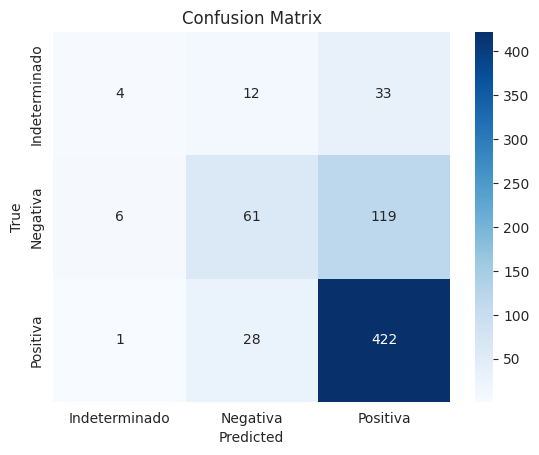

Accuracy para la clase Indeterminado: 0.08163265306122448
Accuracy para la clase Negativa: 0.3279569892473118
Accuracy para la clase Positiva: 0.9356984478935698
Accuracy total: 0.7099125364431487


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test_def, y_pred_rf)

# Get class labels
labels = np.unique(y_test_def)

# Create figure and axes
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

# Configure labels and chart title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()

# Calculate the accuracy for each class
accuracy_per_class = np.diag(confusion) / confusion.sum(axis=1)
for i, label in enumerate(labels):
    print(f"Accuracy for each Class {label}: {accuracy_per_class[i]}")

# Calculate the total accuracy
total_accuracy = np.trace(confusion) / confusion.sum()
print(f"Global Accuracy: {total_accuracy}")